In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('morg-2014-emp.csv')

In [457]:
df.info()  # two columns(ethnic and unioncov) missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

In [3]:
# select occupations: all types of teachers, occ2012 from 2200 to 2340
df.loc[((df['occ2012'] >= 2200) & (df['occ2012'] <= 2340)), 'sample'] = 1
# Extract the data information of the selected occupation
df = df.loc[df['sample'] == 1, :].reset_index(drop=True)

In [4]:
len(df)  # Total number of teachers

8278

In [8]:
# target value of this task
df['earn_per_hour'] = df['earnwke'] / df['uhours']

In [10]:
# distribution of earning
df.loc[:, ['earnwke', 'uhours', 'earn_per_hour']].describe()

,earnwke,uhours,earn_per_hour
count,8278.000000,8278.000000,8278.000000
mean,993.516006,39.145567,25.605661
std,586.851367,10.964558,20.748074
min,0.230000,1.000000,0.004107
25%,583.232500,40.000000,15.734182
50%,923.000000,40.000000,22.500000
75%,1250.000000,40.000000,31.110833
max,2884.610000,99.000000,1076.920000


In [17]:
df['sex'] = (df['sex'] == 2).astype(int)  # 1: male  0: female
df['agepower'] = np.square(df['age'])

<AxesSubplot:xlabel='sex', ylabel='count'>

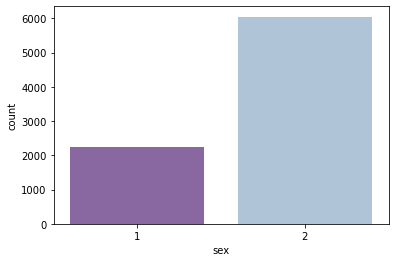

In [16]:
# sex count
sns.countplot(x='sex', data=df, palette='BuPu_r')

In [19]:
# linear regression model one
reg1 = smf.ols(formula='earn_per_hour~sex', data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          earn_per_hour   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     75.37
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           4.66e-18
Time:                        21:55:23   Log-Likelihood:                -36811.
No. Observations:                8278   AIC:                         7.363e+04
Df Residuals:                    8276   BIC:                         7.364e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8504      0.437     65.973      0.000      27.993      29.708
sex           -4.4419      0.512     -8.681      0.000      -5.445      -3.439
==============================================================================
Omnibus:                    19021.250   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        310065758.188
Skew:                          21.848   Prob(JB):                         0.00
Kurtosis:                     950.127   Cond. No.                         3.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# linear regression model two
reg2 = smf.ols(formula='earn_per_hour~sex+age', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          earn_per_hour   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     189.5
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           3.31e-81
Time:                        21:55:20   Log-Likelihood:                -36663.
No. Observations:                8278   AIC:                         7.333e+04
Df Residuals:                    8275   BIC:                         7.335e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2233      0.895     17.003      0.000      13.468      16.978
sex           -4.4524      0.503     -8.858      0.000      -5.438      -3.467
age            0.3268      0.019     17.348      0.000       0.290       0.364
==============================================================================
Omnibus:                    19384.489   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        353980923.932
Skew:                          22.874   Prob(JB):                         0.00
Kurtosis:                    1015.021   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# linear regression model three
reg3 = smf.ols(formula='earn_per_hour~sex+age+agepower', data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          earn_per_hour   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     149.1
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           4.30e-94
Time:                        21:55:39   Log-Likelihood:                -36630.
No. Observations:                8278   AIC:                         7.327e+04
Df Residuals:                    8274   BIC:                         7.330e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5110      2.835     -2.297      0.022     -12.068      -0.954
sex           -4.5784      0.501     -9.140      0.000      -5.560      -3.596
age            1.4488      0.140     10.336      0.000       1.174       1.724
agepower      -0.0133      0.002     -8.078      0.000      -0.017      -0.010
==============================================================================
Omnibus:                    19450.684   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        361318642.525
Skew:                          23.067   Prob(JB):                         0.00
Kurtosis:                    1025.460   Cond. No.                     2.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# linear regression model four
reg4 = smf.ols(formula='earn_per_hour~sex+age+agepower+grade92', data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          earn_per_hour   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     174.8
Date:                Fri, 01 Oct 2021   Prob (F-statistic):          5.67e-144
Time:                        21:55:41   Log-Likelihood:                -36512.
No. Observations:                8278   AIC:                         7.303e+04
Df Residuals:                    8273   BIC:                         7.307e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -91.5823      6.171    -14.841      0.000    -103.678     -79.486
sex           -3.7051      0.497     -7.454      0.000      -4.680      -2.731
age            0.9527      0.142      6.716      0.000       0.675       1.231
agepower      -0.0081      0.002     -4.922      0.000      -0.011      -0.005
grade92        2.2075      0.143     15.463      0.000       1.928       2.487
==============================================================================
Omnibus:                    19761.897   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        401831810.177
Skew:                          23.985   Prob(JB):                         0.00
Kurtosis:                    1081.290   Cond. No.                     6.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Model comparison
models = ['model1', 'model2', 'model3', 'model4']
rmse = [np.sqrt(reg1.mse_resid), np.sqrt(reg2.mse_resid), np.sqrt(reg3.mse_resid), np.sqrt(reg4.mse_resid)]
bic = [reg1.bic, reg2.bic, reg3.bic, reg4.bic]

In [477]:
# cross-validation RMSE
mse = cross_val_score(LinearRegression(), df[['sex']], df['earn_per_hour'], cv=5, scoring='neg_mean_squared_error')
reg1_rmse = np.mean([np.sqrt(-x) for x in mse])

mse = cross_val_score(LinearRegression(), df[['sex', 'age']], df['earn_per_hour'], cv=5, scoring='neg_mean_squared_error')
reg2_rmse = np.mean([np.sqrt(-x) for x in mse])

mse = cross_val_score(LinearRegression(), df[['sex', 'age', 'agepower']], df['earn_per_hour'], cv=5, scoring='neg_mean_squared_error')
reg3_rmse = np.mean([np.sqrt(-x) for x in mse])

mse = cross_val_score(LinearRegression(), df[['sex', 'age', 'agepower', 'grade92']], df['earn_per_hour'], cv=5, scoring='neg_mean_squared_error')
reg4_rmse = np.mean([np.sqrt(-x) for x in mse])

cv_rmse = [reg1_rmse, reg2_rmse, reg3_rmse, reg4_rmse]

In [486]:
print('From left to right the model gradually becomes more complex.')
print('RMSE in the full sample:', rmse)
print('Cross-validated RMSE:   ', cv_rmse)
print('BIC in the full sample: ', bic)

From left to right the model gradually becomes more complex.
RMSE in the full sample: [20.65549024972839, 20.29105293705827, 20.212736815457355, 19.9280335820242]
Cross-validated RMSE:    [19.791420769273916, 19.3948013711385, 19.31578492926771, 18.983999201857856]
BIC in the full sample:  [73639.24484165398, 73352.55073808494, 73296.5478689116, 73069.71390798177]


In [472]:
# relationship between model complexity and performance

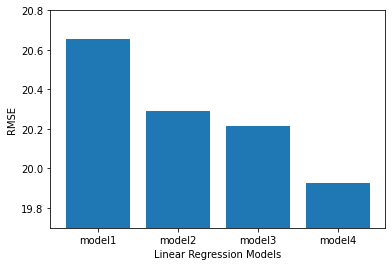

In [473]:
# RMSE in the full sample
plt.bar(models, rmse)
plt.xlabel('Linear Regression Models')
plt.ylabel('RMSE')
plt.ylim([19.7, 20.8])
plt.show()

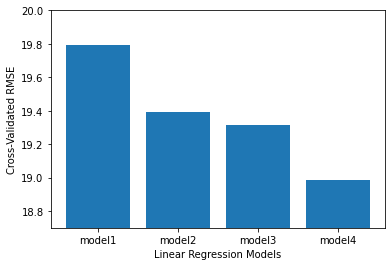

In [474]:
plt.bar(models, cv_rmse)
plt.xlabel('Linear Regression Models')
plt.ylabel('Cross-Validated RMSE')
plt.ylim([18.7, 20])
plt.show()

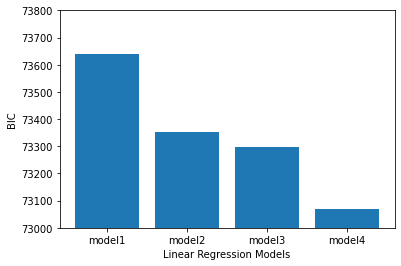

In [475]:
# BIC in the full sample
plt.bar(models, bic)
plt.xlabel('Linear Regression Models')
plt.ylabel('BIC')
plt.ylim([73000, 73800])
plt.show()

In [ ]:
# 需要写在pdf的
模型1选择性别作为predictor，Why？因为从对社会就业以及男女性工作能力分析得出，性别会对工资产生不小的影响。
模型2在模型1的基础上添加年龄作为predictors。根据常识，不同年龄段的人工作能力差别大，且同一个人在不同年龄会拿到不同的工资。
模型3在模型2的基础上添加了年龄的平方作为predictors。猜测增加年龄的平方会产生一些影响。
模型4在模型3的基础上添加了grade92作为predictors，grade92表示这个人完成的最高学历。根据一般知识我们知道，一个人的学历越高，
那么ta很可能拿到更多的工资。

结果分析：
前提知识，模型的BIC，RMSE评价指标越小表示模型的预测能力越好。从上三图可以看出，和为什么选择这些因素理由吻合。从模型1到模型2，可以看出rmse
和bic均下降很多，模型3在模型2的基础上小幅度下降，增加最高学历信息后，模型4在所有模型中表现最优。